Description: THis is a Sentiment Analysis program that parses the tweets fetched from Twitter using Python.


Import Libraries

In [1]:
# 1. import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

In [2]:
# 2. set connection
consumer_key="HM9PRUHq7jldbHMdLoXFDcx1y"
consumer_secret="MnJAx7Kp8IDyW9hPL1wH41Bonp7tSNF1ChUjaMIgQMazsGnpEj"
access_token="1598349728252821504-heiEapi16g6rQNc01Nu3RMUIlpSkFI"
access_token_secret="f4FQ5R3GkgMbc0Rp4Zo1xEHfGpuFK36DyF1ssCucH83WC"

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)


In [3]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df=pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT","User_location"])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [4]:
# 4. Function to extract tweets
def get_tweets(Topic,Count):
    i=0
    for tweet in tweepy.Cursor(api.search_tweets,q=Topic,Count=100,lang='en',exclude="retweets").items():
        print(i,end='/r')
        df.loc[i,'Date']=tweet.created_at
        df.loc[i,'User']=tweet.user.name
        df.loc[i,'IsVerified']=tweet.user.verified
        df.loc[i,'Tweet']=tweet.text
        df.loc[i,'Likes']=tweet.favorite_count
        df.loc[i,'RT']=tweet.retweet_count
        df.loc[i,'User_location']=tweet.user.location
        df.to_csv("TweetDataset.csv")
        i=i+1
        if i>Count:
            break
        else:
            pass


In [10]:
Topic=["Arsenal"]
get_tweets(Topic, Count=100)

Unexpected parameter: Count
Unexpected parameter: exclude


0/r

Unexpected parameter: Count
Unexpected parameter: exclude


1/r2/r3/r4/r5/r6/r7/r8/r9/r10/r11/r12/r13/r14/r

Unexpected parameter: Count
Unexpected parameter: exclude


15/r16/r17/r18/r19/r20/r21/r22/r23/r24/r25/r26/r27/r28/r29/r

Unexpected parameter: Count
Unexpected parameter: exclude


30/r31/r32/r33/r34/r35/r36/r37/r38/r39/r40/r41/r42/r43/r44/r

Unexpected parameter: Count
Unexpected parameter: exclude


45/r46/r47/r48/r49/r50/r51/r52/r53/r54/r55/r56/r57/r58/r59/r

Unexpected parameter: Count
Unexpected parameter: exclude


60/r61/r62/r63/r64/r65/r66/r67/r68/r69/r70/r71/r72/r73/r74/r

Unexpected parameter: Count
Unexpected parameter: exclude


75/r76/r77/r78/r79/r80/r81/r82/r83/r84/r85/r86/r87/r88/r89/r90/r91/r92/r93/r94/r95/r96/r97/r98/r99/r100/r

In [11]:
df.head(10)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2022-12-10 05:47:54+00:00,Julio Arts 🇺🇬,False,@LoneChildMJB My guy is comparing Arsenal chap...,0,0,"Kampala, Uganda"
1,2022-12-10 05:47:09+00:00,Wakid Halid,False,@CNSG35 @GoatedSancho @UtdEIIis @ImmaFCB42 @de...,0,0,
2,2022-12-10 05:45:00+00:00,ESPN Asia,True,Ahead of tonight's @FIFAWorldCup quarterfinal ...,1,0,Asia
3,2022-12-10 05:44:04+00:00,🇵🇭 MFFL.PH 🇵🇭,False,JKidd seriously doesn't have any imaginative e...,5,0,Republic of the Philippines
4,2022-12-10 05:43:52+00:00,SWYZ.com,False,Martinelli that came from Serie D to Arsenal a...,0,0,"The Junction, Toronto"
5,2022-12-10 05:42:55+00:00,CAD,False,People are raving about the World Cup and I ca...,1,0,In your head
6,2022-12-10 05:42:49+00:00,Lisandro Messinger,False,@SemperFiArsenal Big part. Arsenal supporters ...,0,0,de Río Colorado en La Plata
7,2022-12-10 05:42:22+00:00,Samorai Lenana,False,Kuna Arsenal player amequalify for semis?,0,0,Rumion
8,2022-12-10 05:42:08+00:00,Lloyd dan zecheous,False,@ivan_kalanzi How do i bet on the team to win ...,0,0,Entebbe City
9,2022-12-10 05:42:01+00:00,Pun African,False,@afcjxmes Not too late for Son to come to Arsenal,1,0,"Kiambu, Kenya"


Analyzing the tweets


In [12]:
# Function to clean the tweets

import re
def clean_tweets(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])',' ',str(tweet).lower()).split())
   
# (@[A-Za-z0-9]+) : Delete Anything like @hello etc
# (^[A-Za-z0-9 \t]) : Delete everything that starts other than text,number,space,tabspace
# (\w+:\/\/\S+) : Delete https://
# ([RT]) : Delete RT from the tweet

In [13]:
# call the function to get clean tweets

df['Clean Tweets']=df['Tweet'].apply(lambda x:clean_tweets(x))
df.head()

,Date,User,IsVerified,Tweet,Likes,RT,User_location,Clean Tweets
0,2022-12-10 05:47:54+00:00,Julio Arts 🇺🇬,False,@LoneChildMJB My guy is comparing Arsenal chap...,0,0,"Kampala, Uganda",my guy is comparing arsenal chaps to ronaldo
1,2022-12-10 05:47:09+00:00,Wakid Halid,False,@CNSG35 @GoatedSancho @UtdEIIis @ImmaFCB42 @de...,0,0,,they is a debate united ain t too 3 football w...
2,2022-12-10 05:45:00+00:00,ESPN Asia,True,Ahead of tonight's @FIFAWorldCup quarterfinal ...,1,0,Asia,ahead of tonight s quarterfinal with manager g...
3,2022-12-10 05:44:04+00:00,🇵🇭 MFFL.PH 🇵🇭,False,JKidd seriously doesn't have any imaginative e...,5,0,Republic of the Philippines,jkidd seriously doesn t have any imaginative e...
4,2022-12-10 05:43:52+00:00,SWYZ.com,False,Martinelli that came from Serie D to Arsenal a...,0,0,"The Junction, Toronto",martinelli that came from serie d to arsenal a...


In [14]:
# function to analyze sentiments 

from textblob import TextBlob
def sentiment_analyze(tweet):
    analysis=TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return 'positive'
    elif analysis.sentiment.polarity==0:
        return 'neutral'
    else:
        return 'negative'

In [15]:
# call the function to analyze tweets

df['Sentiment']=df['Tweet'].apply(lambda x: sentiment_analyze(x))
df.head(10)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,Clean Tweets,Sentiment
0,2022-12-10 05:47:54+00:00,Julio Arts 🇺🇬,False,@LoneChildMJB My guy is comparing Arsenal chap...,0,0,"Kampala, Uganda",my guy is comparing arsenal chaps to ronaldo,neutral
1,2022-12-10 05:47:09+00:00,Wakid Halid,False,@CNSG35 @GoatedSancho @UtdEIIis @ImmaFCB42 @de...,0,0,,they is a debate united ain t too 3 football w...,positive
2,2022-12-10 05:45:00+00:00,ESPN Asia,True,Ahead of tonight's @FIFAWorldCup quarterfinal ...,1,0,Asia,ahead of tonight s quarterfinal with manager g...,neutral
3,2022-12-10 05:44:04+00:00,🇵🇭 MFFL.PH 🇵🇭,False,JKidd seriously doesn't have any imaginative e...,5,0,Republic of the Philippines,jkidd seriously doesn t have any imaginative e...,negative
4,2022-12-10 05:43:52+00:00,SWYZ.com,False,Martinelli that came from Serie D to Arsenal a...,0,0,"The Junction, Toronto",martinelli that came from serie d to arsenal a...,positive
5,2022-12-10 05:42:55+00:00,CAD,False,People are raving about the World Cup and I ca...,1,0,In your head,people are raving about the world cup and i ca...,neutral
6,2022-12-10 05:42:49+00:00,Lisandro Messinger,False,@SemperFiArsenal Big part. Arsenal supporters ...,0,0,de Río Colorado en La Plata,big part arsenal supporters knew that emi was ...,positive
7,2022-12-10 05:42:22+00:00,Samorai Lenana,False,Kuna Arsenal player amequalify for semis?,0,0,Rumion,kuna arsenal player amequalify for semis,neutral
8,2022-12-10 05:42:08+00:00,Lloyd dan zecheous,False,@ivan_kalanzi How do i bet on the team to win ...,0,0,Entebbe City,kalanzi how do i bet on the team to win epl co...,positive
9,2022-12-10 05:42:01+00:00,Pun African,False,@afcjxmes Not too late for Son to come to Arsenal,1,0,"Kiambu, Kenya",not too late for son to come to arsenal,negative


In [16]:
# check summary of random record

n=10
print("Original Tweet:\n",df['Tweet'][n])
print()
print('Clean Tweet:\n',df['Clean Tweets'][n])
print()
print('Sentiment of the tweet:\n',df['Sentiment'][n])

Original Tweet:
 @Ayomide76289963 @Arsenal That is why our progress low

Clean Tweet:
 that is why our progress low

Sentiment of the tweet:
 neutral


In [17]:
# Overall Summary

print("Total tweets extracted for topic: {}: are:{}".format(Topic,len(df['Tweet'])))
print("Total Positive Tweets are:{}".format(len(df[df['Sentiment']=='positive'])))
print("Total Neutral Tweets are:{}".format(len(df[df['Sentiment']=='neutral'])))
print("Total Negative Tweets are:{}".format(len(df[df['Sentiment']=='negative'])))

Total tweets extracted for topic: ['Arsenal']: are:101
Total Positive Tweets are:50
Total Neutral Tweets are:39
Total Negative Tweets are:12


In [18]:
df['Sentiment'].value_counts()

positive    50
neutral     39
negative    12
Name: Sentiment, dtype: int64

Data Visualization 

Text(0.5, 1.0, 'Summary of counts for total tweets')

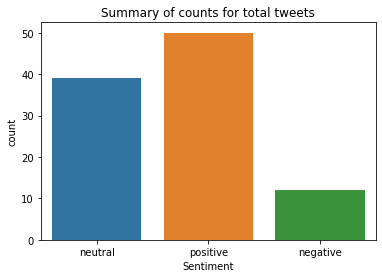

In [19]:
sns.countplot(x=df['Sentiment'])
plt.title("Summary of counts for total tweets")

([<matplotlib.patches.Wedge at 0x236ad9bf460>,
 [Text(0.018662168743108328, 1.1998548759986785, 'Positive'),
  Text(-1.1304411100990353, -0.4026200399856682, 'Negative'),
  Text(0.42015177706212403, -1.1240429192124024, 'Neutral')],
 [Text(0.010886265100146522, 0.6999153443325623, '49.50%'),
  Text(-0.6594239808911038, -0.23486168999163978, '11.88%'),
  Text(0.24508853661957233, -0.6556917028739013, '38.61%')])

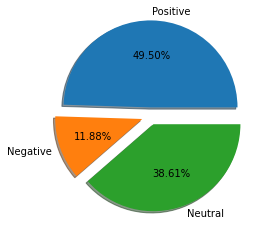

In [20]:
a=len(df[df['Sentiment']=='positive'])
b=len(df[df['Sentiment']=='negative'])
c=len(df[df['Sentiment']=='neutral'])
d=np.array([a,b,c])
explode=(0.1,0.1,0.1)
plt.pie(d,labels=['Positive','Negative','Neutral'],shadow=True,autopct='%1.2f%%',explode=explode)

Text(0.5, 1.0, 'Summary of Total tweets ,distributed by whether account isverified or not')

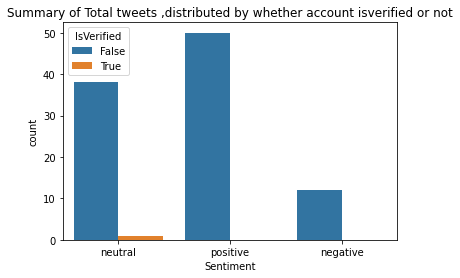

In [21]:
sns.countplot(x=df['Sentiment'],hue=df['IsVerified'])
plt.title('Summary of Total tweets ,distributed by whether account isverified or not')

Generate Word Clouds

In [22]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

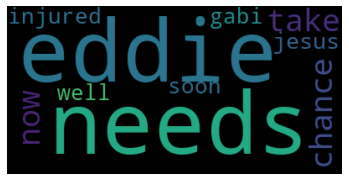

In [23]:
# start with one review

text=df['Clean Tweets'][50]
wordcloud=WordCloud(max_words=10).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
# Function to preprocess data for wordcloud

def prepcloud(Topic_text,Topic):
    Topic=str(Topic).lower()
    Topic=' '.join(re.sub('[^0-9A-Za-z \t]',' ',Topic).split())
    Topic=re.split("\s+",str(Topic))
    stopwords=set(STOPWORDS)
    stopwords.update('Topic') #Add our topic in Stopwords, so it doesnt appear in wordCloud

    text_new=" ".join(txt for txt in Topic_text.split() if txt not in stopwords)
    return text_new
    

There are 7700 words in the combination of all review


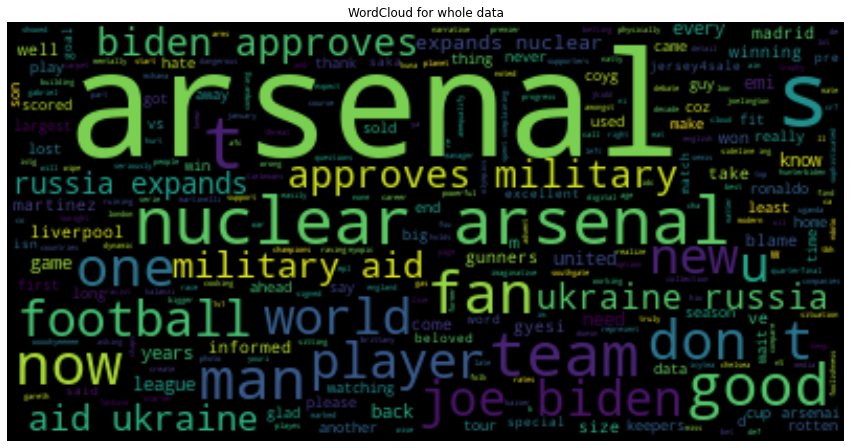

In [25]:
# wordcloud for whole data

text=" ".join(review for review in df['Clean Tweets'])
print("There are {} words in the combination of all review".format(len(text)) )

# create stopwords list
stopwords=set(STOPWORDS)

text_newALL=prepcloud(text,Topic)
wordcloud=WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('WordCloud for whole data')
plt.axis("off")
plt.show()

There are 7700 words in the combination of all review


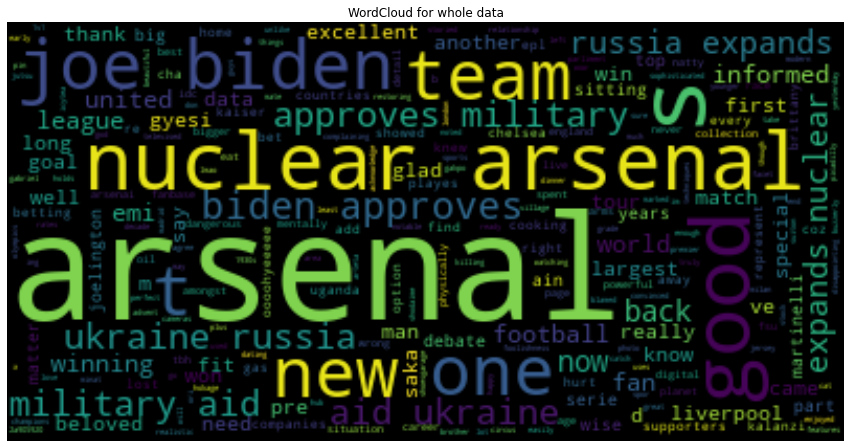

In [26]:
# wordcloud for positive tweets only

text_positive=" ".join(review for review in df[df['Sentiment']=='positive']['Clean Tweets'])
print("There are {} words in the combination of all review".format(len(text)) )

# create stopwords list
stopwords=set(STOPWORDS)

text_newALL=prepcloud(text_positive,Topic)
wordcloud=WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('WordCloud for whole data')
plt.axis("off")
plt.show()

There are 7700 words in the combination of all review


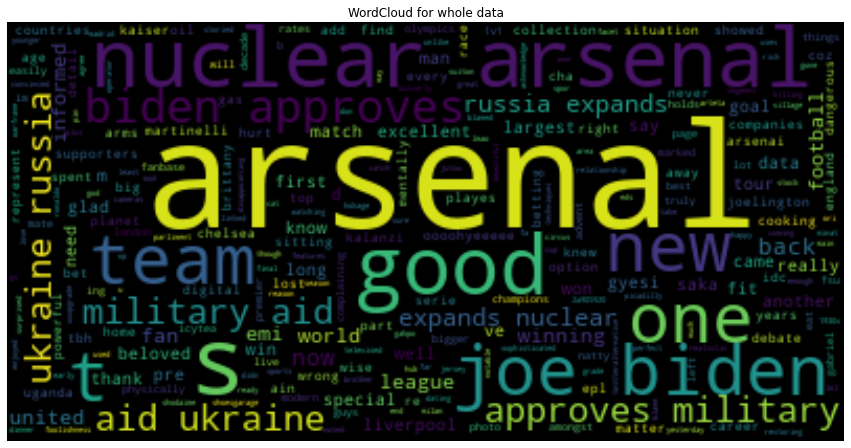

In [27]:
text_negative=" ".join(review for review in df[df['Sentiment']=='negative']['Clean Tweets'])
print("There are {} words in the combination of all review".format(len(text)) )

# create stopwords list
stopwords=set(STOPWORDS)

text_negative=prepcloud(text_positive,Topic)
wordcloud=WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_negative)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('WordCloud for whole data')
plt.axis("off")
plt.show()

In [41]:
# get tweets from  twitter account

df1=pd.DataFrame(columns=["Date","author","twitter_name","Tweet","Likes","RT"])

In [42]:
def get_tweets_from_user(twitter_user_name, count_tweet=200):
    i=0
    for tweet in tweepy.Cursor(api.user_timeline,screen_name=twitter_user_name,count=count_tweet ).items():
        print(i,end='/r')
        df1.loc[i,'Date']=tweet.created_at
        df1.loc[i,'author']=tweet.user.name
        df1.loc[i,'twitter_name']=tweet.user.screen_name
        df1.loc[i,'Tweet']=tweet.text
        df1.loc[i,'Likes']=tweet.favorite_count
        df1.loc[i,'RT']=tweet.retweet_count
        df1.to_csv("TweetDataset.csv")
        i=i+1
        if i>count_tweet:
            break
        else:
            pass

In [43]:
data = get_tweets_from_user("iamsrk")


0/r1/r2/r3/r4/r5/r6/r7/r8/r9/r10/r11/r12/r13/r14/r15/r16/r17/r18/r19/r20/r21/r22/r23/r24/r25/r26/r27/r28/r29/r30/r31/r32/r33/r34/r35/r36/r37/r38/r39/r40/r41/r42/r43/r44/r45/r46/r47/r48/r49/r50/r51/r52/r53/r54/r55/r56/r57/r58/r59/r60/r61/r62/r63/r64/r65/r66/r67/r68/r69/r70/r71/r72/r73/r74/r75/r76/r77/r78/r79/r80/r81/r82/r83/r84/r85/r86/r87/r88/r89/r90/r91/r92/r93/r94/r95/r96/r97/r98/r99/r100/r101/r102/r103/r104/r105/r106/r107/r108/r109/r110/r111/r112/r113/r114/r115/r116/r117/r118/r119/r120/r121/r122/r123/r124/r125/r126/r127/r128/r129/r130/r131/r132/r133/r134/r135/r136/r137/r138/r139/r140/r141/r142/r143/r144/r145/r146/r147/r148/r149/r150/r151/r152/r153/r154/r155/r156/r157/r158/r159/r160/r161/r162/r163/r164/r165/r166/r167/r168/r169/r170/r171/r172/r173/r174/r175/r176/r177/r178/r179/r180/r181/r182/r183/r184/r185/r186/r187/r188/r189/r190/r191/r192/r193/r194/r195/r196/r197/r198/r199/r200/r

In [44]:
df1.head(10)

,Date,author,twitter_name,Tweet,Likes,RT
0,2022-12-10 05:30:26+00:00,Shah Rukh Khan,iamsrk,@deepikapadukone |\n@TheJohnAbraham | #Siddhar...,1752,455
1,2022-12-10 05:30:25+00:00,Shah Rukh Khan,iamsrk,"Mirror mirror on the wall, she’s the most glam...",8749,2402
2,2022-12-09 05:31:27+00:00,Shah Rukh Khan,iamsrk,@deepikapadukone | @TheJohnAbraham | #Siddhart...,6357,1351
3,2022-12-09 05:31:06+00:00,Shah Rukh Khan,iamsrk,#BesharamRang ka waqt aa gaya hai… almost! Son...,30490,6494
4,2022-12-01 05:30:16+00:00,Shah Rukh Khan,iamsrk,Peti baandh li hai..? Toh chalein!!! #55DaysTo...,55382,9910
5,2022-11-30 14:56:05+00:00,Shah Rukh Khan,iamsrk,"A very big Shukran to @mocsaudi_en , the team ...",56244,9444
6,2022-11-11 08:49:15+00:00,Shah Rukh Khan,iamsrk,To 15 fabulous years of excellence… perseveran...,76536,8914
7,2022-11-05 08:51:32+00:00,Shah Rukh Khan,iamsrk,Done now. All asking when I am coming to their...,43414,4520
8,2022-11-05 08:48:05+00:00,Shah Rukh Khan,iamsrk,Burj Khalifa team is always very loving and ma...,30231,3544
9,2022-11-05 08:44:39+00:00,Shah Rukh Khan,iamsrk,I normally just wear black or white https://t....,24660,2937


In [45]:
df1['Clean Tweets']=df1['Tweet'].apply(lambda x:clean_tweets(x))
df1.head()

,Date,author,twitter_name,Tweet,Likes,RT,Clean Tweets
0,2022-12-10 05:30:26+00:00,Shah Rukh Khan,iamsrk,@deepikapadukone |\n@TheJohnAbraham | #Siddhar...,1752,455,siddharthanand
1,2022-12-10 05:30:25+00:00,Shah Rukh Khan,iamsrk,"Mirror mirror on the wall, she’s the most glam...",8749,2402,mirror mirror on the wall she s the most glamo...
2,2022-12-09 05:31:27+00:00,Shah Rukh Khan,iamsrk,@deepikapadukone | @TheJohnAbraham | #Siddhart...,6357,1351,siddharthanand
3,2022-12-09 05:31:06+00:00,Shah Rukh Khan,iamsrk,#BesharamRang ka waqt aa gaya hai… almost! Son...,30490,6494,besharamrang ka waqt aa gaya hai almost song o...
4,2022-12-01 05:30:16+00:00,Shah Rukh Khan,iamsrk,Peti baandh li hai..? Toh chalein!!! #55DaysTo...,55382,9910,peti baandh li hai toh chalein 55daystopathaan...


In [46]:
df1['Sentiment']=df1['Tweet'].apply(lambda x: sentiment_analyze(x))
df1.head(10)

,Date,author,twitter_name,Tweet,Likes,RT,Clean Tweets,Sentiment
0,2022-12-10 05:30:26+00:00,Shah Rukh Khan,iamsrk,@deepikapadukone |\n@TheJohnAbraham | #Siddhar...,1752,455,siddharthanand,neutral
1,2022-12-10 05:30:25+00:00,Shah Rukh Khan,iamsrk,"Mirror mirror on the wall, she’s the most glam...",8749,2402,mirror mirror on the wall she s the most glamo...,positive
2,2022-12-09 05:31:27+00:00,Shah Rukh Khan,iamsrk,@deepikapadukone | @TheJohnAbraham | #Siddhart...,6357,1351,siddharthanand,neutral
3,2022-12-09 05:31:06+00:00,Shah Rukh Khan,iamsrk,#BesharamRang ka waqt aa gaya hai… almost! Son...,30490,6494,besharamrang ka waqt aa gaya hai almost song o...,neutral
4,2022-12-01 05:30:16+00:00,Shah Rukh Khan,iamsrk,Peti baandh li hai..? Toh chalein!!! #55DaysTo...,55382,9910,peti baandh li hai toh chalein 55daystopathaan...,positive
5,2022-11-30 14:56:05+00:00,Shah Rukh Khan,iamsrk,"A very big Shukran to @mocsaudi_en , the team ...",56244,9444,a very big shukran to en the team and all who ...,neutral
6,2022-11-11 08:49:15+00:00,Shah Rukh Khan,iamsrk,To 15 fabulous years of excellence… perseveran...,76536,8914,to 15 fabulous years of excellence perseveranc...,positive
7,2022-11-05 08:51:32+00:00,Shah Rukh Khan,iamsrk,Done now. All asking when I am coming to their...,43414,4520,done now all asking when i am coming to their ...,negative
8,2022-11-05 08:48:05+00:00,Shah Rukh Khan,iamsrk,Burj Khalifa team is always very loving and ma...,30231,3544,burj khalifa team is always very loving and ma...,positive
9,2022-11-05 08:44:39+00:00,Shah Rukh Khan,iamsrk,I normally just wear black or white https://t....,24660,2937,i normally just wear black or white,negative


In [47]:
print("Total Positive Tweets are:{}".format(len(df[df['Sentiment']=='positive'])))
print("Total Neutral Tweets are:{}".format(len(df[df['Sentiment']=='neutral'])))
print("Total Negative Tweets are:{}".format(len(df[df['Sentiment']=='negative'])))


Total Positive Tweets are:50
Total Neutral Tweets are:39
Total Negative Tweets are:12
